In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import matplotlib as mpl


mpl.rcParams.update({
    'font.family':          'sans-serif',
    'font.sans-serif':      ['Arial'],
    'mathtext.fontset':     'custom',
    'mathtext.rm':          'Arial',
    'mathtext.it':          'Arial:italic',
    'mathtext.bf':          'Arial:bold',
    'mathtext.cal':         'Arial',        # for calligraphic if you like
})

In [2]:
df_total=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Total attention\matched_data.csv')
df_domestic=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Domestic attention\matched_data.csv')
df_foreign=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Foreign attention\matched_data.csv')

In [67]:
CEM1=list(set(df_total['Mention_country'])-set(abbr))
CEM2=list(set(df_domestic['Mention_country'])-set(abbr))
CEM3=list(set(df_foreign['Mention_country'])-set(abbr))
mena=list(set(['are', 'bhr', 'dji', 'dza', 'egy', 'irn', 'irq', 'isr', 'jor',
       'kwt', 'lbn', 'lby', 'mar', 'omn', 'pse', 'qat', 'sau', 'syr',
       'tun', 'yem'])-set(abbr))

In [56]:

pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df['Country Code']=pop_df['Country Code'].apply(lambda x: x.lower())
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values

excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS",   # Timor-Leste
    "GEO", #Georgia
    'SWZ', 
    'PRK', #North Korea
]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]


possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [126]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
#df=df[df['Mention_country']==df['Aff_country']]
df=df[(df['Mention_country'].isin(possible_iso))&(df['Aff_country'].isin(possible_iso))]
df = df[df['year'].isin(np.arange(2002, 2020))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df=df.groupby(['year', 'Mention_country'])['count'].sum().reset_index()

df['CEM1']=df['Mention_country'].apply(lambda x: 1 if x in CEM1 else 0)
df['CEM2']=df['Mention_country'].apply(lambda x: 1 if x in CEM2 else 0)
df['CEM3']=df['Mention_country'].apply(lambda x: 1 if x in CEM3 else 0)
df['MENA']=df['Mention_country'].apply(lambda x: 1 if x in mena else 0)

df['treated']=df['Mention_country'].isin(abbr).astype(int)
df['treated_CW']=df['Mention_country'].isin(['yem', 'lby', 'syr']).astype(int)
df['treated_GO']=df['Mention_country'].isin(['egy', 'tun']).astype(int)
df['treated_GC']=df['Mention_country'].isin(['omn', 'kwt', 'bhr', 'mar','jor']).astype(int)
df['rest_of_world']=1-df['treated']


In [127]:
treated=df[df['treated']==1].groupby([ 'year'])['count'].mean()
rest_of_world=df[df['treated']==0].groupby([ 'year'])['count'].mean()
CW=df[df['treated_CW']==1].groupby([ 'year'])['count'].mean()
GO=df[df['treated_GO']==1].groupby([ 'year'])['count'].mean()
GC=df[df['treated_GC']==1].groupby([ 'year'])['count'].mean()
cem1=df[df['CEM1']==1].groupby([ 'year'])['count'].mean()
cem2=df[df['CEM2']==1].groupby([ 'year'])['count'].mean()
cem3=df[df['CEM3']==1].groupby([ 'year'])['count'].mean()
MENA=df[df['MENA']==1].groupby([ 'year'])['count'].mean()
suffix='_total'
df_complete=pd.DataFrame({'treated'+suffix:treated, 'rest_of_world'+suffix:rest_of_world,
                           'CW'+suffix:CW, 'GO'+suffix:GO,
                           'GC'+suffix:GC, 'MENA'+suffix:MENA, 'cem1'+suffix:cem1, 'cem2'+suffix:cem2, 'cem3'+suffix:cem3}, ).reset_index()

df_complete.to_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure%s_attention.csv'%suffix, index=False)

In [128]:
df_domestic_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_domestic_attention.csv')
df_foreign_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_foreign_attention.csv')
df_total_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_total_attention.csv')

In [129]:
df_full=pd.merge(df_domestic_complete, df_foreign_complete, on='year')
df_full=pd.merge(df_full, df_total_complete, on='year')

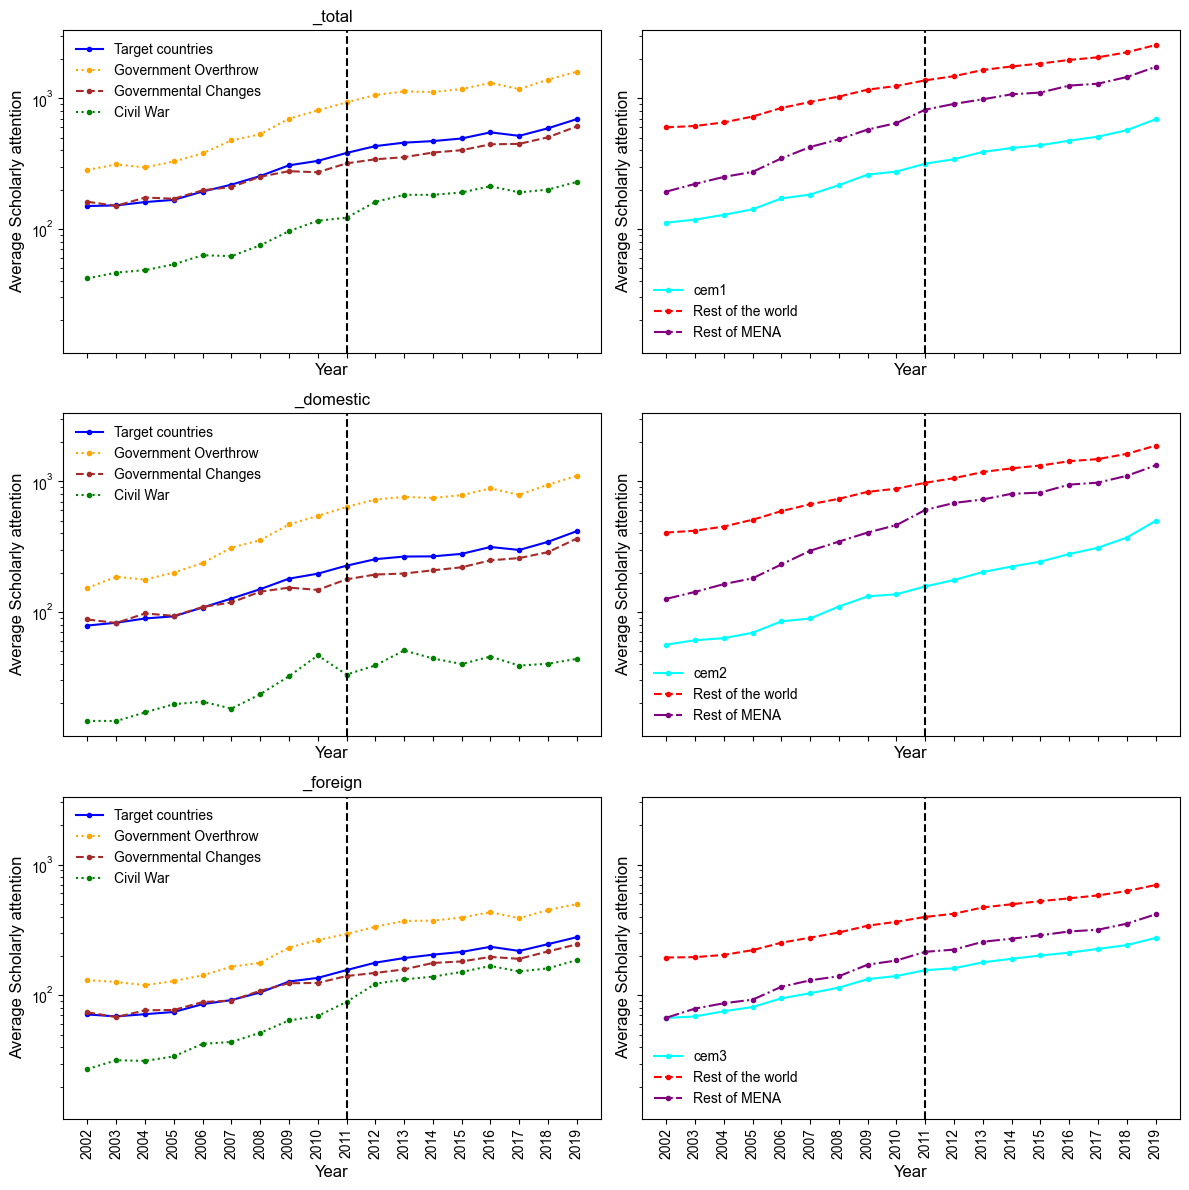

In [133]:
fig, ax=plt.subplots(figsize=(12,12), ncols=2, nrows=3, sharex= True, sharey=True)
ax=ax.flat
for index_axis, suffix in enumerate(['_total', '_domestic', '_foreign']):
    ax[index_axis*2].plot(df_full['year'], df_full['treated'+suffix], label='Target countries', color='blue', linestyle='-', marker='.')
    ax[index_axis*2].plot(df_full['year'], df_full['GO'+suffix], label='Government Overthrow', color='orange', linestyle=':', marker='.')
    ax[index_axis*2].plot(df_full['year'], df_full['GC'+suffix], label='Governmental Changes', color='brown', linestyle='--', marker='.')
    ax[index_axis*2].plot(df_full['year'], df_full['CW'+suffix], label='Civil War', color='green', linestyle=':', marker='.')
    ax[index_axis*2+1].plot(df_full['year'], df_full[f'cem{index_axis+1}'+suffix], label=f'cem{index_axis+1}', color='cyan', linestyle='-', marker='.')
    ax[index_axis*2+1].plot(df_full['year'], df_full['rest_of_world'+suffix], label='Rest of the world', color='red', linestyle='--', marker='.')
    ax[index_axis*2+1].plot(df_full['year'], df_full['MENA'+suffix], label='Rest of MENA', color='purple', linestyle='-.', marker='.')
    ax[index_axis*2].set_title(suffix)


for i, axis in enumerate(ax):
    axis.set_xlabel('Year', fontsize=12)
    axis.set_ylabel('Average Scholarly attention', fontsize=12)
    if i%2==0:
        loc='upper left'
    else:
        loc='lower left'
    axis.legend(loc=loc, frameon=False)
    axis.set_yscale('log')
    axis.axvline(x=2011, color='black', linestyle='--')
    axis.set_xticks(range(2002, 2020))
    axis.set_xticklabels(range(2002, 2020), rotation=90)

fig.tight_layout()

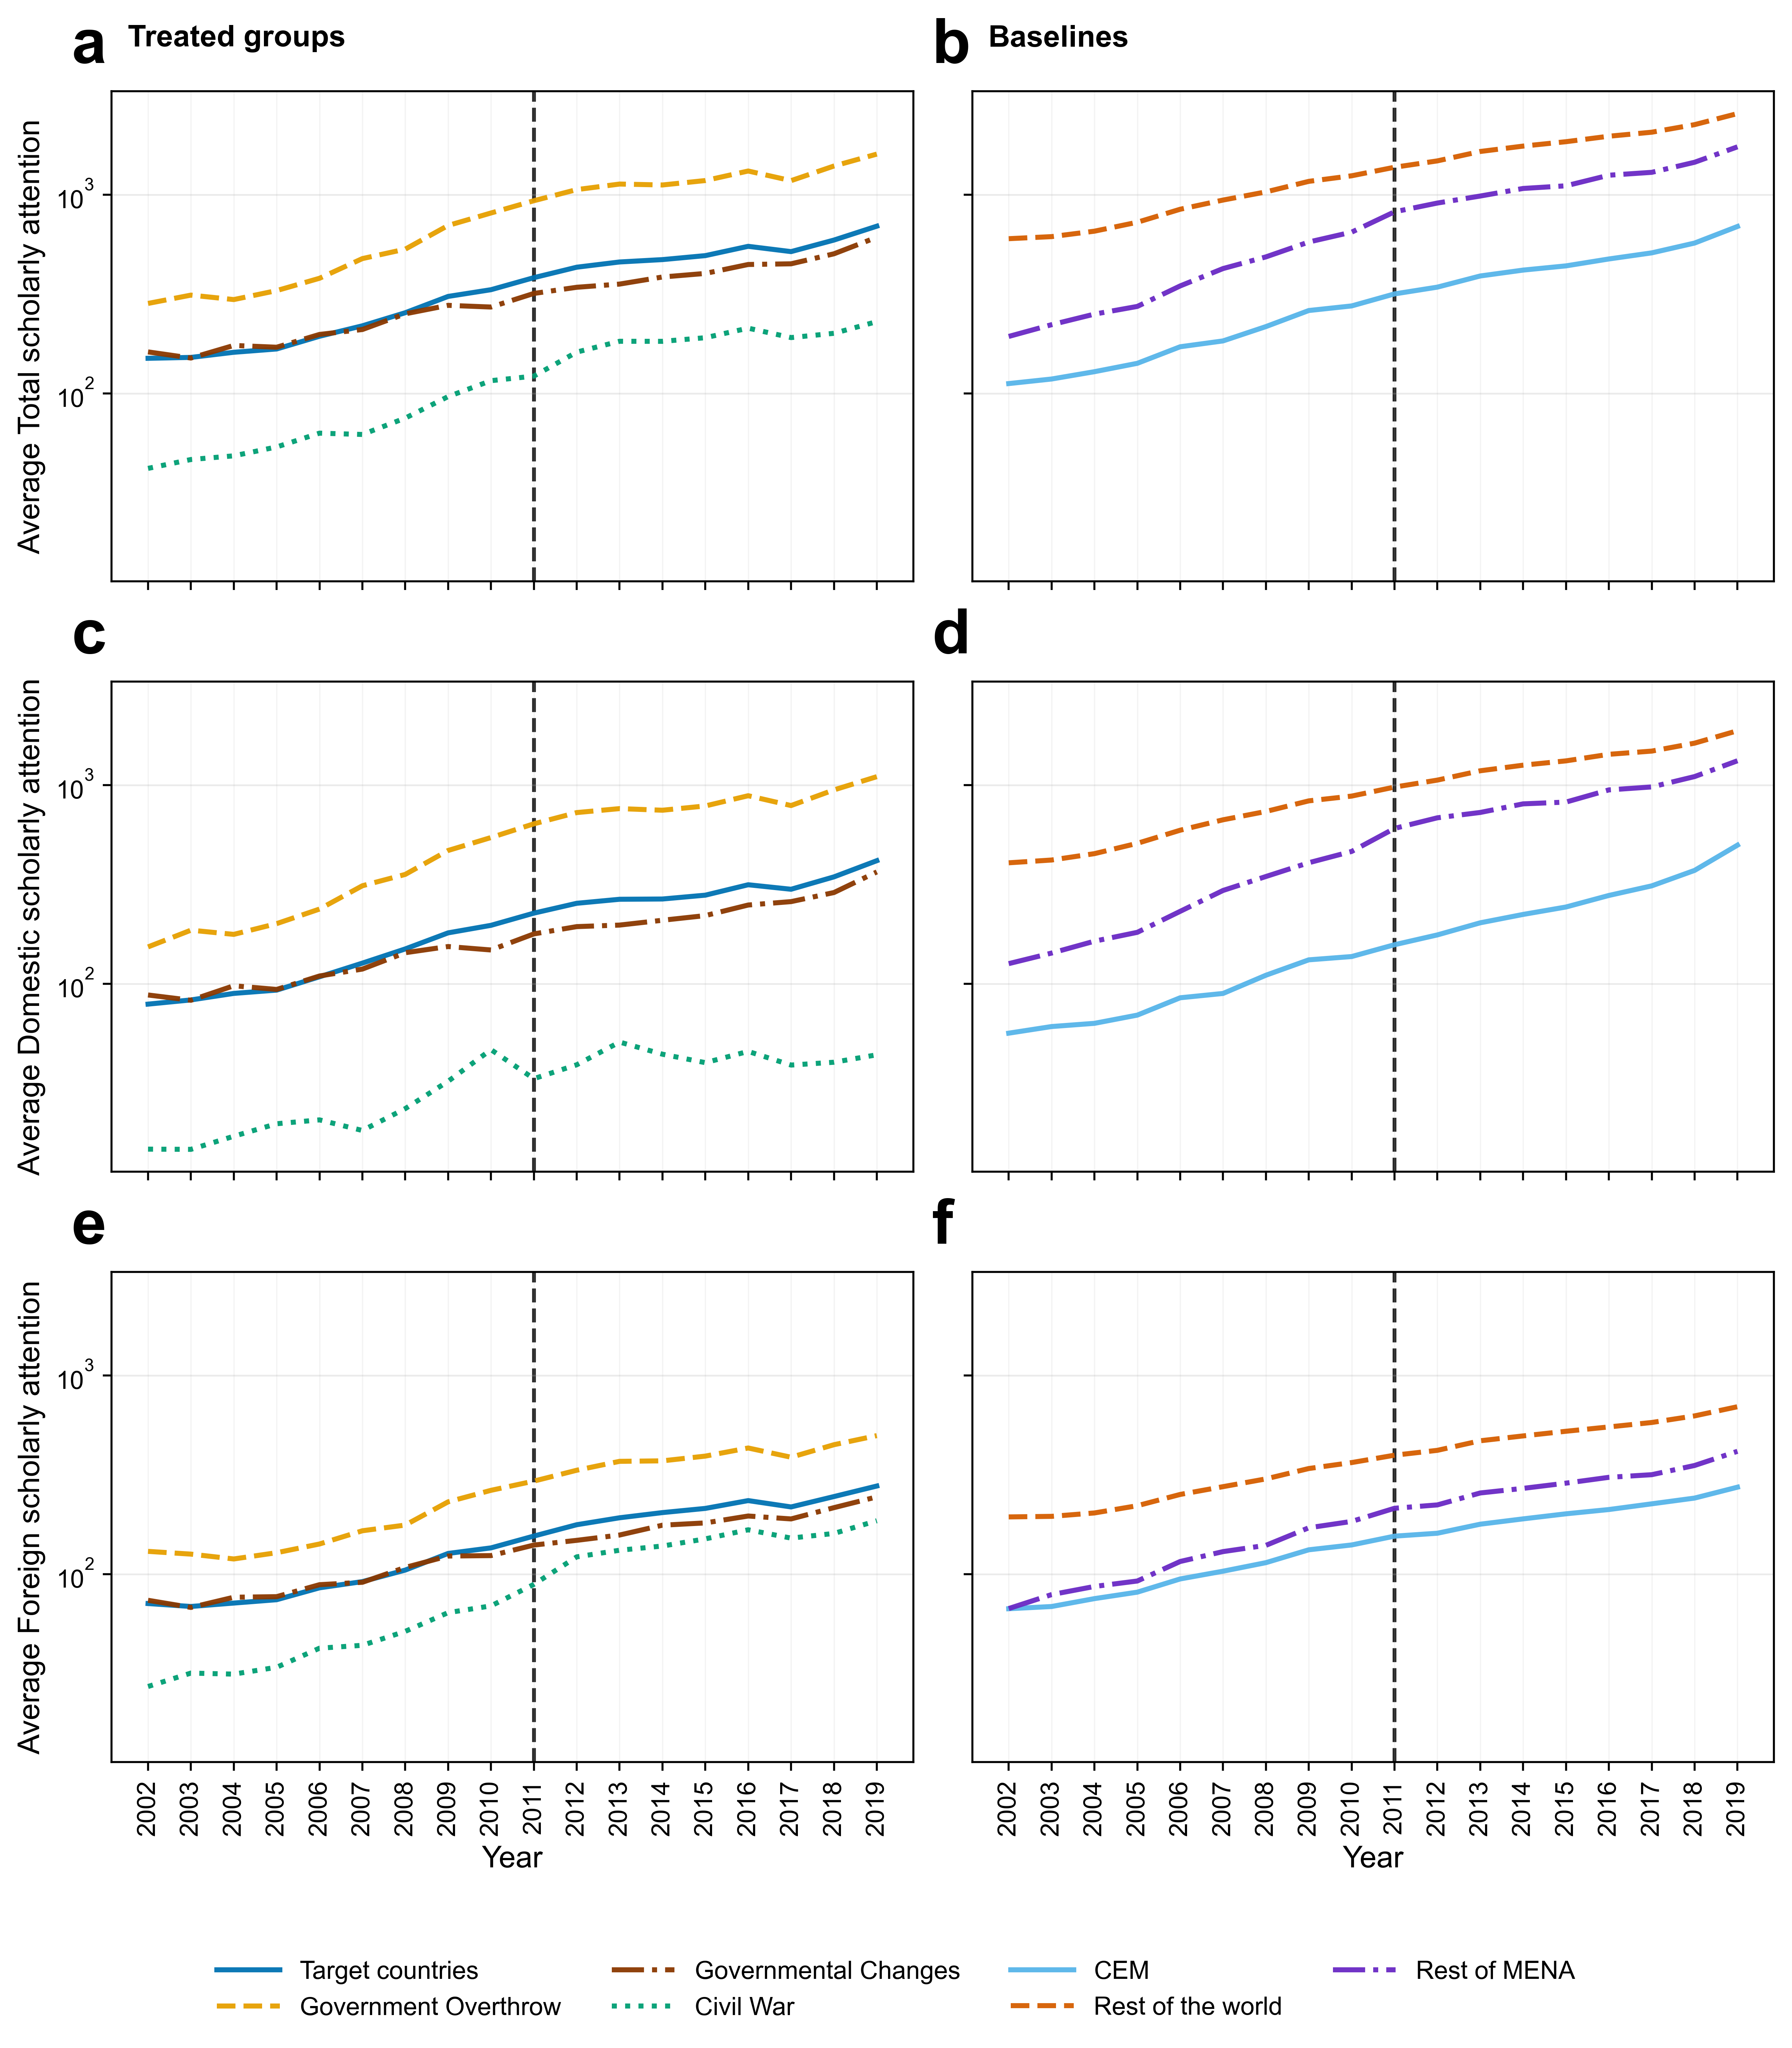

In [160]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- color-blind friendly palette you provided ---
colors = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#6929C4",  # Purple 70
    "#CC79A7",  # Reddish Purple
    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    "#999933",  # Olive/Teal-ish
    "#8A3800",  # Brown-ish
    "#882255",  # Wine
]

# Map each line to a consistent style (color + linestyle)
style_left = {
    "Target countries": dict(color=colors[5], ls="-"),    # blue
    "Government Overthrow": dict(color=colors[0], ls="--"),
    "Governmental Changes": dict(color=colors[8], ls="-."),  # brown-ish
    "Civil War": dict(color=colors[2], ls=":"),
}
style_right = {
    "cem": dict(color=colors[1], ls="-"),                 # sky blue
    "Rest of the world": dict(color=colors[6], ls="--"),  # vermillion
    "Rest of MENA": dict(color=colors[3], ls="-."),       # purple
}

suffixes = ["_total", "_domestic", "_foreign"]
pretty_title = {"_total": "Total", "_domestic": "Domestic", "_foreign": "Foreign"}

fig, ax = plt.subplots(
    ncols=2, nrows=3,
    figsize=(10, 10.5),dpi=500,
    sharex=True, sharey=True,
   
)
ax = ax.ravel()

lw = 2.0
alpha = 0.95

for r, suffix in enumerate(suffixes):
    aL = ax[r*2]
    aR = ax[r*2 + 1]

    # --- left column ---
    aL.plot(df_full["year"], df_full["treated"+suffix],
            label="Target countries", lw=lw, alpha=alpha, **style_left["Target countries"])
    aL.plot(df_full["year"], df_full["GO"+suffix],
            label="Government Overthrow", lw=lw, alpha=alpha, **style_left["Government Overthrow"])
    aL.plot(df_full["year"], df_full["GC"+suffix],
            label="Governmental Changes", lw=lw, alpha=alpha, **style_left["Governmental Changes"])
    aL.plot(df_full["year"], df_full["CW"+suffix],
            label="Civil War", lw=lw, alpha=alpha, **style_left["Civil War"])

    # --- right column ---
    aR.plot(df_full["year"], df_full[f"cem{r+1}"+suffix],
            label=f"CEM", lw=lw, alpha=alpha, **style_right["cem"])
    aR.plot(df_full["year"], df_full["rest_of_world"+suffix],
            label="Rest of the world", lw=lw, alpha=alpha, **style_right["Rest of the world"])
    aR.plot(df_full["year"], df_full["MENA"+suffix],
            label="Rest of MENA", lw=lw, alpha=alpha, **style_right["Rest of MENA"])


# --- global axis formatting ---
years = list(range(2002, 2020))
for i, a in enumerate(ax):
    a.set_yscale("log")

    # Vertical intervention line (Arab Spring start)
    a.axvline(2011, color="0.15", lw=1.5, ls="--", zorder=0)

    # Subtle grid (major only; log minors can get messy)
    a.grid(True, which="major", axis="y", lw=0.7, alpha=0.25)
    a.grid(True, which="major", axis="x", lw=0.5, alpha=0.15)

    # x ticks only on bottom row (cleaner)
    a.set_xticks(years)
    if i < 4:
        a.set_xticklabels([])
    else:
        a.set_xticklabels(years, rotation=90)

    # nicer log tick labels
    a.yaxis.set_major_locator(mticker.LogLocator(base=10))
    a.yaxis.set_major_formatter(mticker.LogFormatterMathtext(base=10))
    a.yaxis.set_minor_locator(mticker.NullLocator())

# column labels / shared labels
for a in ax[4:6]:
    a.set_xlabel("Year", fontsize=12)
for a, s in zip(ax[0::2], ['Total', 'Domestic', 'Foreign']):
    a.set_ylabel(f"Average {s} scholarly attention", fontsize=12)

# Optional: column headers
ax[0].text(0.02, 1.08, "Treated groups", transform=ax[0].transAxes,
           fontsize=12, fontweight="bold", va="bottom")
ax[1].text(0.02, 1.08, "Baselines", transform=ax[1].transAxes,
           fontsize=12, fontweight="bold", va="bottom")
import matplotlib.lines as mlines

treated_labels = [
    "Target countries",
    "Government Overthrow",
    "Governmental Changes",
    "Civil War",
]

baseline_labels = [
    "CEM",
    "Rest of the world",
    "Rest of MENA",
]

# collect handles
all_handles = {}
for a in ax:
    h, l = a.get_legend_handles_labels()
    for hh, ll in zip(h, l):
        all_handles[ll] = hh

# dummy invisible handle
dummy = mlines.Line2D([], [], linestyle="none", marker=None, alpha=0)

# pad baselines to match treated count
n_pad = len(treated_labels) - len(baseline_labels)
baseline_labels_padded = baseline_labels + [""] * n_pad

ordered_handles = (
    [all_handles[l] for l in treated_labels] +
    [all_handles[l] for l in baseline_labels] +
    [dummy] * n_pad
)

ordered_labels = treated_labels + baseline_labels_padded

fig.legend(
    ordered_handles,
    ordered_labels,
    ncol=len(treated_labels),
    loc="upper center",
    frameon=False,
    fontsize=10,
    bbox_to_anchor=(0.5, -.02),
    handlelength=2.5
)


for i, v in zip(range(6), ['a', 'b', 'c', 'd', 'e', 'f']):
    ax[i].text(-0.05, 1.15, v, transform=ax[i].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')

fig.tight_layout()
fig.savefig('temporal_trend_matching.pdf', dpi=500)
plt.show()
